In [170]:
import scvelo as scv
import scanpy as sc
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization
sc.settings.set_figure_params(dpi=80, facecolor='white')
import anndata as ad

import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D3FD3"]


In [153]:
import scvelo as scv
import scanpy as sc

import pandas as pd

In [90]:
import os

In [91]:
import anndata

In [92]:
print(anndata.__version__)


0.8.0


In [93]:
import os 
os.getcwd()

'/nemo/lab/santoss/home/users/ingeo/Analysis/Single_cell_RNA_seq_projects/2020_fate_switching_OI/2022_finalised_analysis/RNA_velocity_rerun_23'

In [94]:
ING520A1 = scv.read('ING520A1.loom', cache=True)
ING520A2 = scv.read('ING520A2.loom', cache=True)
ING520A3 = scv.read('ING520A3.loom', cache=True)
ING520A4 = scv.read('ING520A4.loom', cache=True)
ING520A5 = scv.read('ING520A5.loom', cache=True)
ING520A6 = scv.read('ING520A6.loom', cache=True)



/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/

In [95]:
adata = sc.read('/nemo/lab/santoss/home/users/ingeo/Analysis/Single_cell_RNA_seq_projects/2020_fate_switching_OI/2022_finalised_analysis/Pre-processing_repeat/fs_integrated_clean.h5ad')



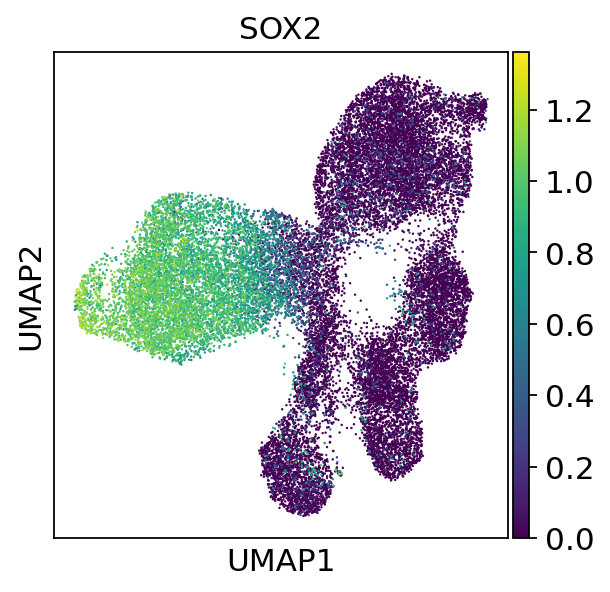

In [96]:
sc.pl.umap(adata, color='SOX2', color_map="viridis")



In [97]:
highlevel_labels = {
    "0": "Pluripotent_1",
    "9": "Pluripotent_2",
    "10": "Pluripotent_3",
    "3": "Mesendoderm",
    "8": "Nascent_Mesoderm",
    "1": "Emergent_Mesoderm_1",
    "11": "Advanced_Mesoderm",
    "5": "Emergent_Mesoderm_2",
    "4": "Endoderm",
    "2": "PGCLCs",
    "7": "Amnion_1",
    "6": "Amnion_2"
    
}
adata.obs["Cell_Types_Fine"] = adata.obs["louvain"].map(highlevel_labels)


highlevel_labels = {
    "Pluripotent_1": "Pluripotent",
    "Pluripotent_2": "Pluripotent",
    "Pluripotent_3": "Pluripotent",
    "Mesendoderm": "Mesendoderm",
    "Nascent_Mesoderm": "Mesoderm",
    "Emergent_Mesoderm_1": "Mesoderm",
    "Advanced_Mesoderm": "Mesoderm",
    "Emergent_Mesoderm_2": "Mesoderm",
    "Endoderm": "Endoderm",
    "PGCLCs": "PGCLCs",
    "Amnion_1": "Amnion",
    "Amnion_2": "Amnion"
    
}
adata.obs["Cell_Types_Coarse"] = adata.obs["Cell_Types_Fine"].map(highlevel_labels)

In [98]:
#adata_subset = adata[adata.obs['batch'].isin(['0','4'])]

In [99]:
ING520A1 = scv.utils.merge(adata[adata.obs['batch'].isin(['0'])], ING520A1)
ING520A2 = scv.utils.merge(adata[adata.obs['batch'].isin(['1'])], ING520A2)
ING520A3 = scv.utils.merge(adata[adata.obs['batch'].isin(['2'])], ING520A3)
ING520A4 = scv.utils.merge(adata[adata.obs['batch'].isin(['3'])], ING520A4)
ING520A5 = scv.utils.merge(adata[adata.obs['batch'].isin(['4'])], ING520A5)
ING520A6 = scv.utils.merge(adata[adata.obs['batch'].isin(['5'])], ING520A6)

In [100]:
adatas = {"0": ING520A1, "1": ING520A2, "2": ING520A3, "3": ING520A4,"4":ING520A5,"5":ING520A6}
adata = ad.concat(adatas, label="batch",  join="outer")

/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [101]:


adata_subset = adata[adata.obs['Cell_Types_Coarse'].isin(['Mesendoderm','Mesoderm', 'Endoderm' ])]

sc.pp.neighbors(adata_subset)

sc.tl.pca(adata_subset)
sc.tl.umap(adata_subset)
sc.tl.diffmap(adata_subset)






/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [102]:

#adata_subset = adata[adata.obs['batch'].isin([
  #  '4','5'])]


/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


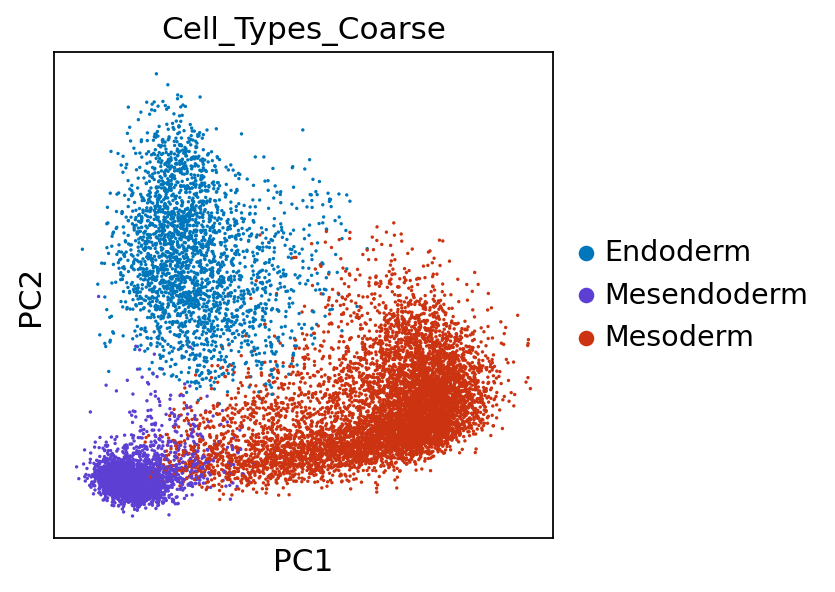

/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


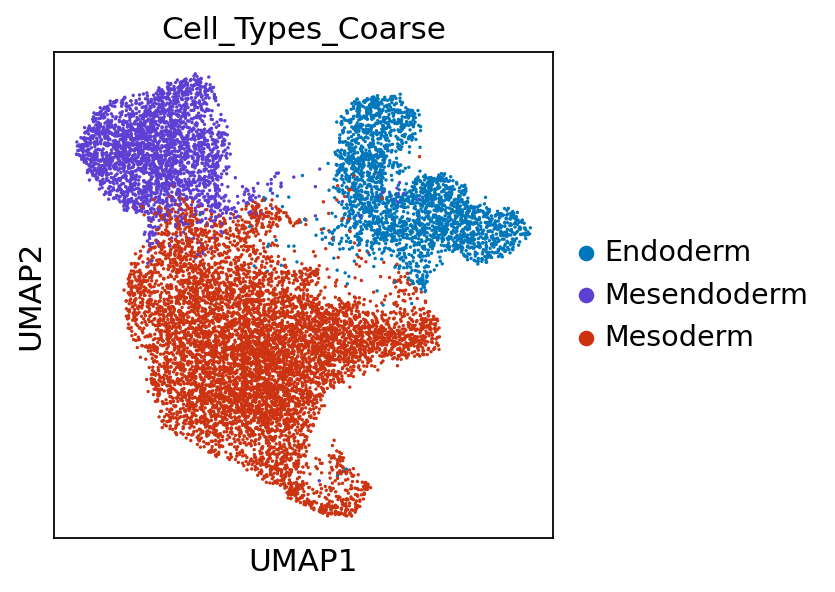

/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


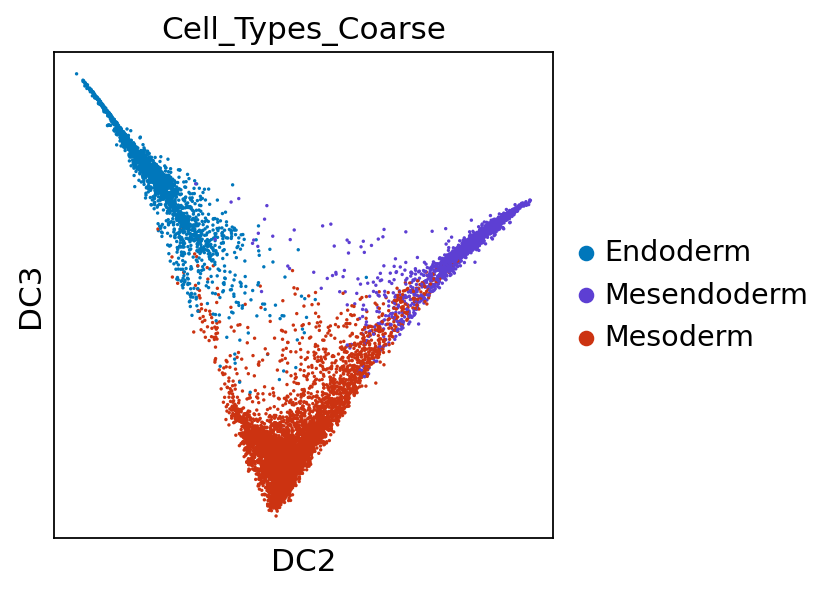

In [103]:
sc.pl.pca(adata_subset, color='Cell_Types_Coarse', palette={
        "Pluripotent": ingeo_colours[6],
               "Mesendoderm": ingeo_colours[7],
               "Endoderm": ingeo_colours[0],
               "Mesoderm": ingeo_colours[4]
    })


sc.pl.umap(adata_subset, color='Cell_Types_Coarse', palette={
        "Pluripotent": ingeo_colours[6],
               "Mesendoderm": ingeo_colours[7],
               "Endoderm": ingeo_colours[0],
               "Mesoderm": ingeo_colours[4]
    })


sc.pl.diffmap(adata_subset, color='Cell_Types_Coarse', palette={
        "Pluripotent": ingeo_colours[6],
               "Mesendoderm": ingeo_colours[7],
               "Endoderm": ingeo_colours[0],
               "Mesoderm": ingeo_colours[4]
    }, components=['2,3'])

In [104]:
scv.pp.moments(adata_subset, n_pcs=30, n_neighbors=30)



Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [105]:
scv.tl.velocity(adata_subset)




computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [106]:
scv.tl.velocity_graph(adata_subset)



computing velocity graph (using 1/256 cores)


  0%|          | 0/12794 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


    finished (0:00:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [107]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization


computing velocity embedding
    finished (0:00:03) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


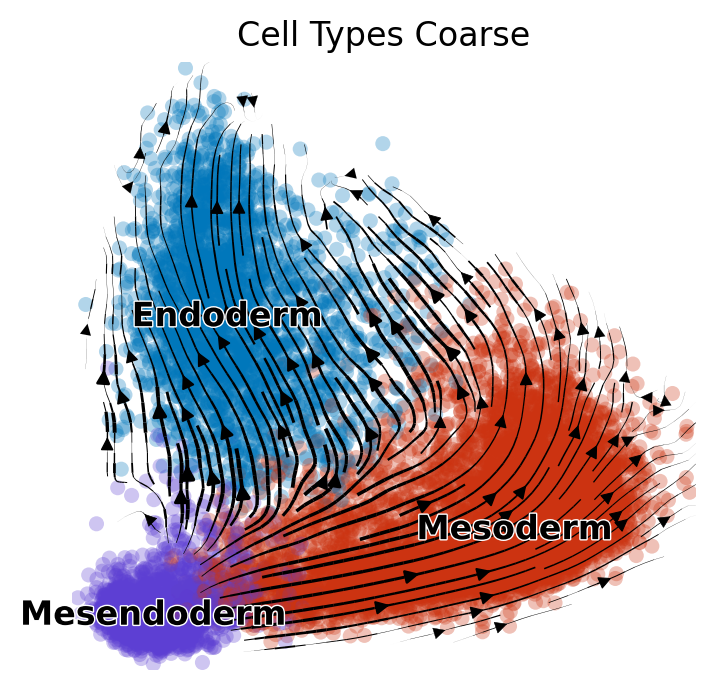

In [108]:

scv.pl.velocity_embedding_stream(adata_subset,
                                 basis='pca', color='Cell_Types_Coarse', figsize=(4,4), smooth=0.5, density=2, palette={
        "Pluripotent": ingeo_colours[6],
               "Mesendoderm": ingeo_colours[7],
               "Endoderm": ingeo_colours[0],
               "Mesoderm": ingeo_colours[4]
    })



In [109]:
scv.tl.recover_dynamics(adata_subset, n_jobs=8)

recovering dynamics (using 8/256 cores)


  0%|          | 0/884 [00:00<?, ?gene/s]

[rank: 0] Global seed set to 0
[rank: 0] Global seed set to 0
[rank: 0] Global seed set to 0
[rank: 0] Global seed set to 0
[rank: 0] Global seed set to 0
[rank: 0] Global seed set to 0
[rank: 0] Global seed set to 0
[rank: 0] Global seed set to 0
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


    finished (0:05:15) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [110]:
scv.tl.velocity(adata_subset, mode="dynamical")

computing velocities


/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [111]:
import cellrank as cr

In [112]:
vk = cr.kernels.VelocityKernel(adata_subset)

In [113]:
vk.compute_transition_matrix()

  0%|          | 0/12794 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


  0%|          | 0/12794 [00:00<?, ?cell/s]

VelocityKernel[n=12794, model='deterministic', similarity='correlation', softmax_scale=8.856]

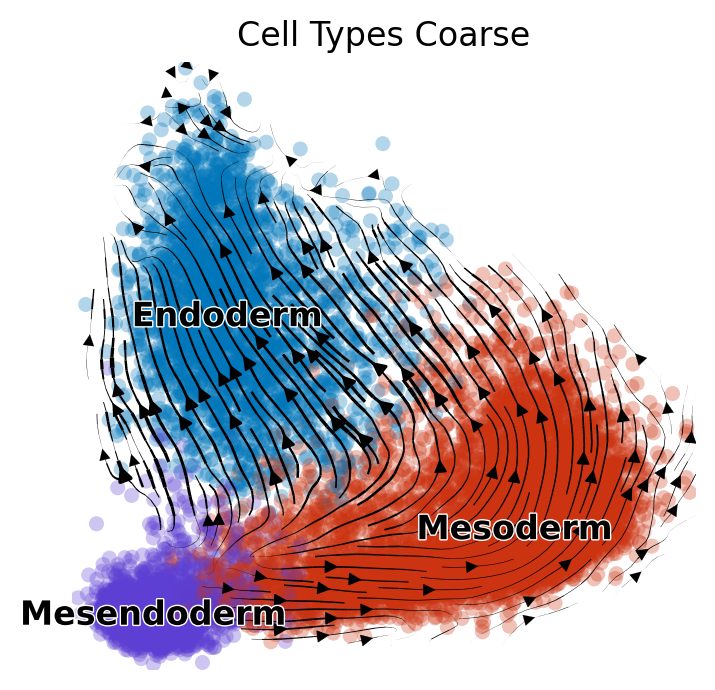

In [114]:
vk.plot_projection(basis="pca", color="Cell_Types_Coarse", stream=True, figsize=(4,4), smooth=0.5, density=2)

In [115]:
g = cr.estimators.GPCCA(vk)


/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [116]:
g.fit(cluster_key="Cell_Types_Coarse", n_states=[2,12], method='brandts')

GPCCA[kernel=VelocityKernel[n=12794], initial_states=None, terminal_states=None]

/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


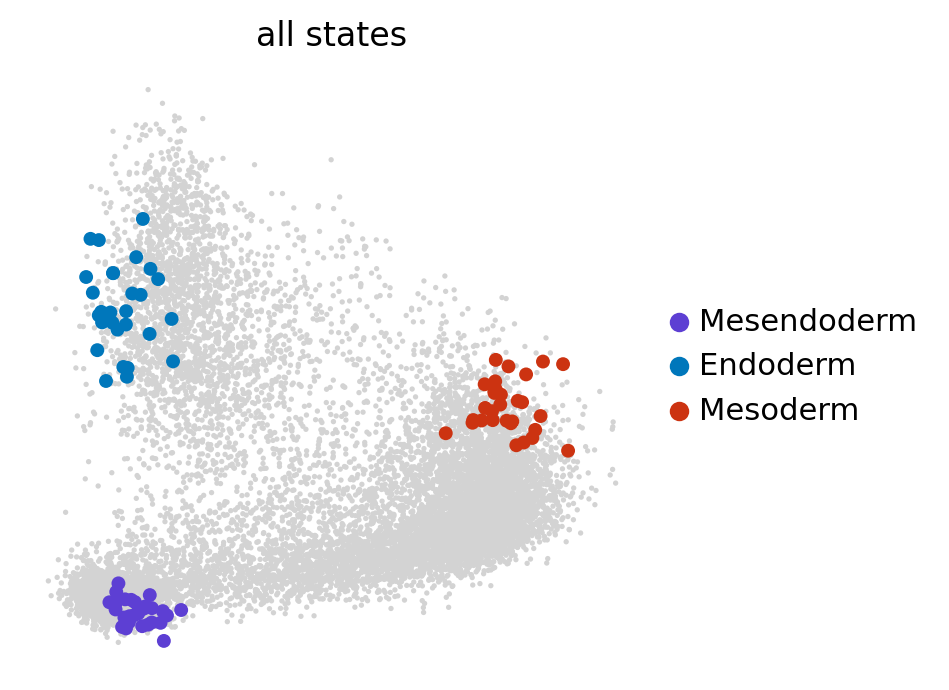

In [117]:
g.plot_macrostates(which="all", discrete=True, legend_loc="right", s=100,  basis="pca", figsize=(4,4))

/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


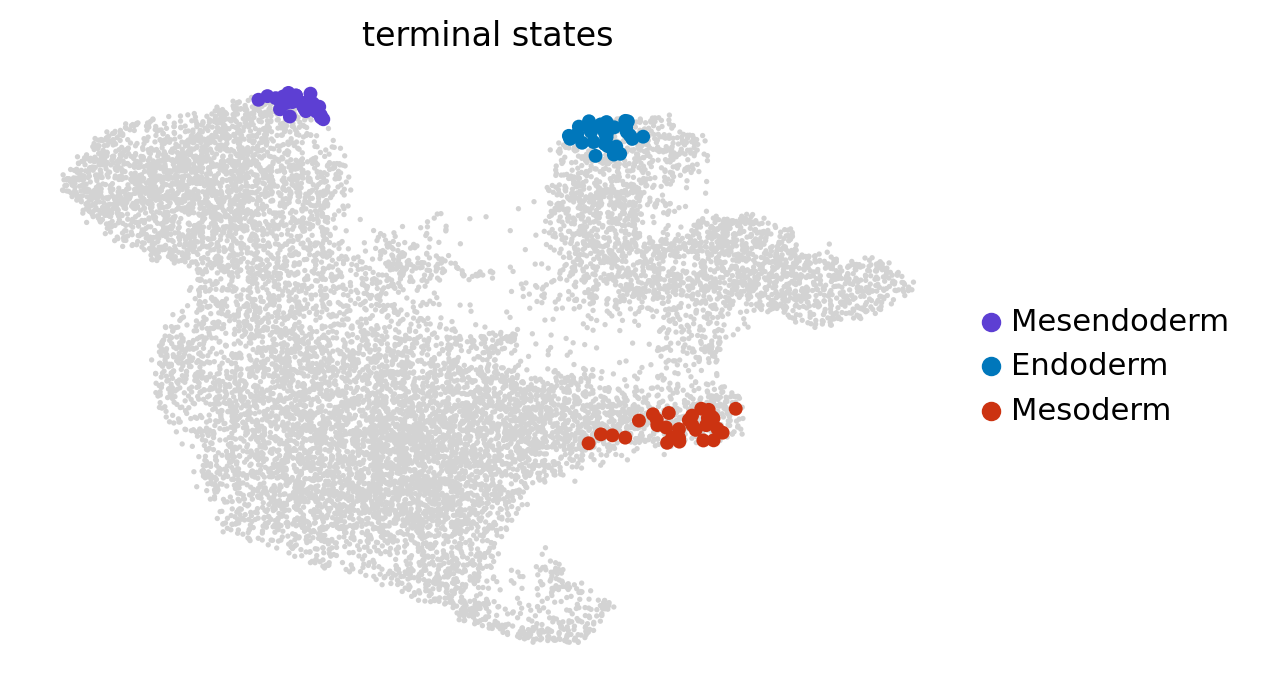

In [118]:
g.predict_terminal_states()
g.plot_macrostates(which="terminal", legend_loc="right", s=100)

In [119]:
g.set_terminal_states(states=["Endoderm", "Mesoderm"], n_cells=100)


GPCCA[kernel=VelocityKernel[n=12794], initial_states=None, terminal_states=['Endoderm', 'Mesoderm']]

In [120]:
g.set_initial_states(states=["Mesendoderm"], n_cells=100)


GPCCA[kernel=VelocityKernel[n=12794], initial_states=['Mesendoderm'], terminal_states=['Endoderm', 'Mesoderm']]

/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


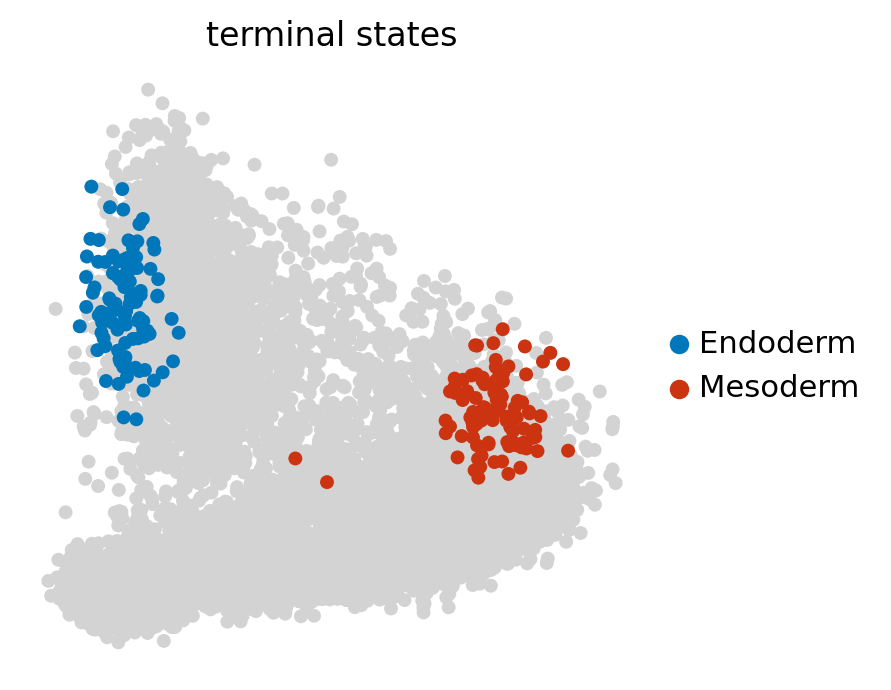

In [121]:
g.plot_macrostates(which="terminal", legend_loc="right", size=100,  basis="pca", figsize=(4,4))

  0%|          | 0/2 [00:00<?, ?/s]

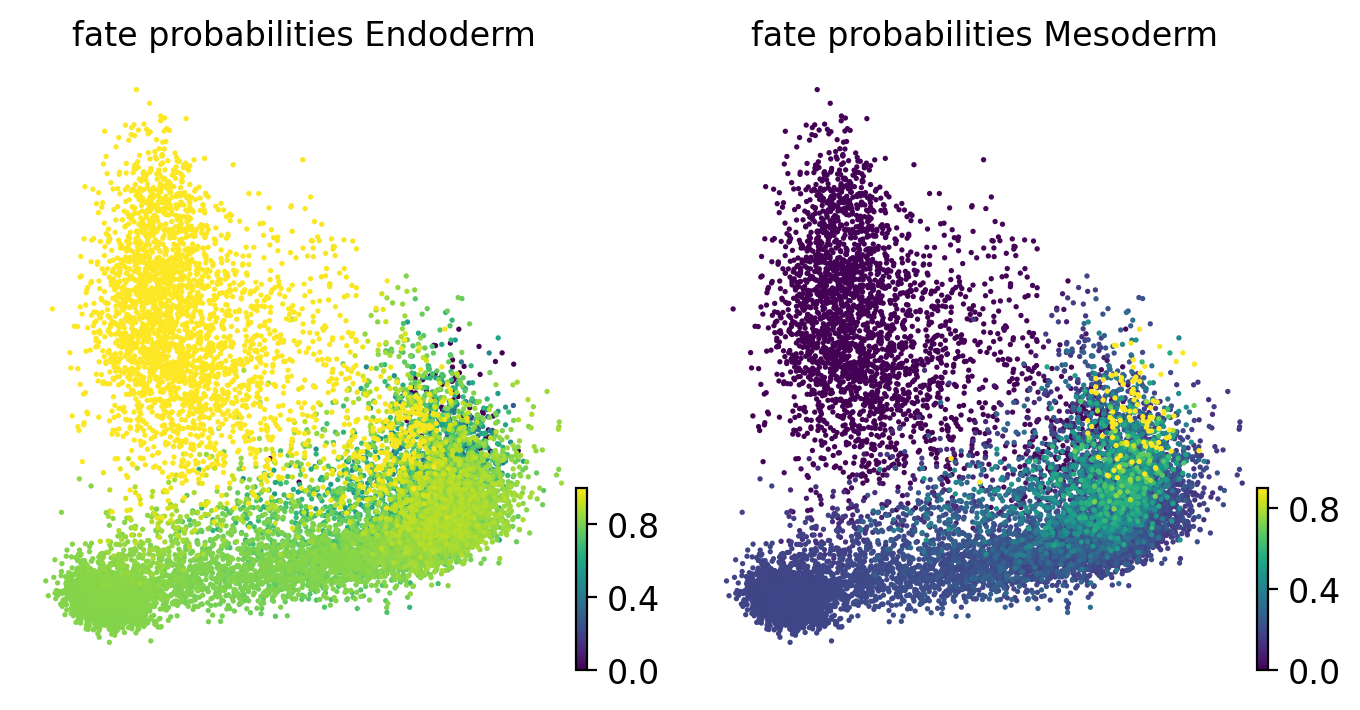

In [122]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(same_plot=False,  basis="pca", figsize=(4,4))

/camp/home/ingeo/.conda/envs/CellRank/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


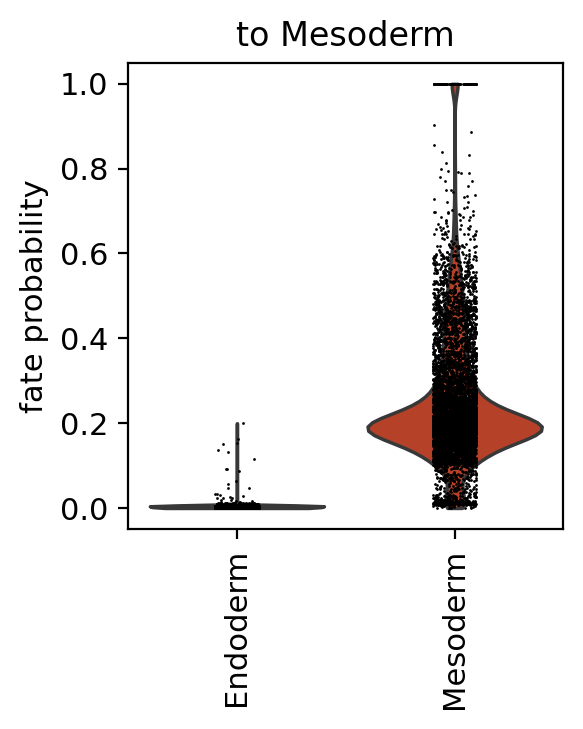

In [128]:
cr.pl.aggregate_fate_probabilities(
    adata_subset,
    mode="violin",
    lineages=["Mesoderm"],
    cluster_key="Cell_Types_Coarse",
    clusters=["Mesoderm","Endoderm"], figsize=(3,3)
)


In [143]:
adata_subset.obs['Cell_Types_Coarse']

AAACCCAAGGAT       Mesoderm
AAACCCACAGTG       Mesoderm
AAACCCATCCAC       Endoderm
AAACCCATCGCA       Mesoderm
AAACGAACACAT    Mesendoderm
                   ...     
TTTGGAGCAGTG    Mesendoderm
TTTGGAGGTTCG       Mesoderm
TTTGTTGGTGCC       Mesoderm
TTTGTTGGTGGT    Mesendoderm
TTTGTTGTCCAG    Mesendoderm
Name: Cell_Types_Coarse, Length: 12794, dtype: category
Categories (3, object): ['Endoderm', 'Mesendoderm', 'Mesoderm']

In [226]:
probs_df = adata_subset.obsm['lineages_fwd']
probs_df = pd.DataFrame(probs_df)
probs_df = probs_df.rename(columns={0:'Endoderm',1:'Mesoderm'})
probs_df['Cell_Types_Coarse'] = list(adata_subset.obs['Cell_Types_Coarse'])


In [227]:
df_long = pd.melt(probs_df, id_vars=['Cell_Types_Coarse'], value_vars=['Endoderm', 'Mesoderm'],
                  var_name='Cell_Type', value_name='Probability')

In [228]:
df_long = df_long.loc[df_long["Cell_Types_Coarse"].isin(["Mesoderm","Endoderm"])]

In [230]:
df_long.loc[(df_long["Cell_Types_Coarse"]=='Endoderm'), "Cell_Types_Coarse"] = 'Endo.'
df_long.loc[(df_long["Cell_Types_Coarse"]=='Mesoderm'), "Cell_Types_Coarse"] = 'Meso.'

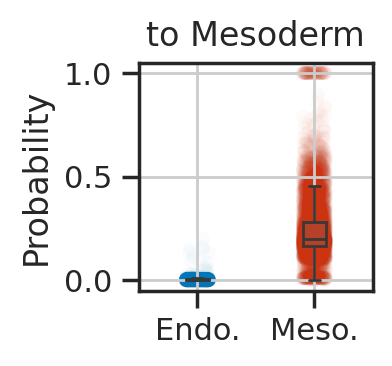

In [254]:
 

selected=df_long.loc[df_long["Cell_Type"]=="Mesoderm"]

plt.figure(figsize=(1.5,1.5), dpi=100)
sns.set_theme(style="ticks")
# Assuming your DataFrame is named df
ax = sns.stripplot(data=selected, x='Cell_Types_Coarse', y='Probability', dodge=False, alpha=0.02, palette=[ingeo_colours[0],ingeo_colours[4]], order=['Endo.','Meso.'], zorder=0)
ax = sns.boxplot(data=selected, x='Cell_Types_Coarse', y='Probability', width=0.2, palette=[ingeo_colours[0],ingeo_colours[4]], order=['Endo.','Meso.'], showfliers=False)

plt.title(f'to Mesoderm')
plt.xlabel(f'')
plt.grid(zorder=0)  #just add this
plt.savefig("to_mesoderm.pdf")


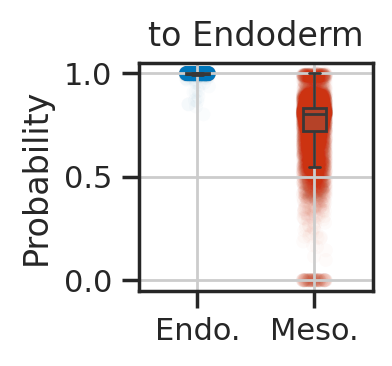

In [255]:
 

selected=df_long.loc[df_long["Cell_Type"]=="Endoderm"]

plt.figure(figsize=(1.5,1.5), dpi=100)
sns.set_theme(style="ticks")
# Assuming your DataFrame is named df
ax = sns.stripplot(data=selected, x='Cell_Types_Coarse', y='Probability', dodge=False, alpha=0.02, palette=[ingeo_colours[0],ingeo_colours[4]], order=['Endo.','Meso.'], zorder=0)
ax = sns.boxplot(data=selected, x='Cell_Types_Coarse', y='Probability', width=0.2, palette=[ingeo_colours[0],ingeo_colours[4]], order=['Endo.','Meso.'], showfliers=False)

plt.title(f'to Endoderm')
plt.xlabel(f'')
plt.grid(zorder=0)  #just add this
plt.savefig("to_endoderm.pdf")

